Question 1:

In [10]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset from this address
dataset_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

# Step 3: Assign it to a variable called users
users = pd.read_csv(dataset_url, sep = "|")

# Step 4: What is the mean age per occupation
mean_age_per_occupation = users.groupby("occupation")["age"].mean()
print("Step 4: Mean Age per Occupation:\n", mean_age_per_occupation)

# Step 5: Discover the Male ratio per occupation and sort it from the most to the least
def male_ratio_per_occupation(group):
  males = group[group["gender"] == "M"].shape[0]
  total = group.shape[0]
  return (males / total) * 100

male_ratio_per_occupation = users.groupby("occupation").apply(male_ratio_per_occupation, include_groups = False)
male_ratio_per_occupation = male_ratio_per_occupation.sort_values(ascending = False)
print("\nStep 5: Male Ratio per Occupation:\n", male_ratio_per_occupation)

# Step 6: For each occupation, calculate the minimum and maximum ages
ages_maxmin_per_occupation = users.groupby("occupation")["age"].agg(["min", "max"])
print("\nStep 6: Min and Max Ages per Occupation:\n", ages_maxmin_per_occupation)

# Step 7: For each combination of occupation and sex, calculate the mean age
mean_age_by_occupation_sex = users.groupby(["occupation", "gender"])["age"].mean()
print("\nStep 7: Mean Age by Occupation and Sex:\n", mean_age_by_occupation_sex)

# Step 8: For each occupation present the percentage of women and men
total_users = len(users)
gender_counts = users.groupby(['occupation', 'gender']).size().unstack(fill_value = 0)
gender_percentage = gender_counts.div(gender_counts.sum(axis = 1), axis = 0) * 100
print(gender_percentage)
print("\nStep 8: Percentage of Women and Men for each Occupation:\n", gender_percentage)

Step 4: Mean Age per Occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Step 5: Male Ratio per Occupation:
 occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
studen

Question 2:

In [1]:
# Step 1: import libraries
import pandas as pd

# Step 2: load the dataset using pd.read_csv with the URL path
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

# Step 3: Assign variable
euro12 = pd.read_csv(url)

# Step 4: Select only the Goal column
goal_column = euro12['Goals']
print(goal_column)

# Step 5: How many team participated in the Euro2012?
num_teams = euro12['Team'].nunique()
print(f"Number of teams: {num_teams}")

# Step 6: What is the number of columns in the dataset?
num_columns = euro12.shape[1]
print(f"Number of columns: {num_columns}")

# Step 7: View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

# Step 8: Sort the teams by Red Cards, then to Yellow Cards
sorted_teams = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
print(sorted_teams)

# Step 9: Calculate the mean Yellow Cards given per Team
mean_yellow_cards = discipline['Yellow Cards'].mean()
print(f"Mean Yellow Cards per team: {mean_yellow_cards}")

# Step 10: Filter teams that scored more than 6 goals
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
print(teams_more_than_6_goals[['Team', 'Goals']])

# Step 11: Select the teams that start with G
teams_start_with_G = euro12[euro12['Team'].str.startswith('G')]
print(teams_start_with_G['Team'])

# Step 12: Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print(first_7_columns)

# Step 13: Select all columns except the last 3
all_but_last_3 = euro12.iloc[:, :-3]
print(all_but_last_3)

# Step 14: Present only the Shooting Accuracy from England, Italy and Russia
shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print(shooting_accuracy)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64
Number of teams: 16
Number of columns: 35
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15  

Question 3:

In [9]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2: Create 3 different Series, each of length 100, as follows:
# The first a random number from 1 to 4
# The second a random number from 1 to 3
# The third a random number from 10,000 to 30,000

np.random.seed(42)  # Ensures reproducibility of random numbers
series1 = pd.Series(np.random.randint(1, 5, 100))
series2 = pd.Series(np.random.randint(1, 4, 100))
series3 = pd.Series(np.random.randint(10000, 30001, 100))

# Step 3: Create a DataFrame by joinning the Series by column
df = pd.concat([series1, series2, series3], axis=1)

# Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print(df.head())  # View the first few rows

# Step 5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([series1, series2, series3], axis=0).reset_index(drop=True).to_frame(name='bigcolumn')
print(bigcolumn.head())  # View the first few rows

# Step 6:Ops it seems it is going only until index 99. Is it true?
print(bigcolumn.index)  # Verify the range of indices

# Step 7: Reindex the DataFrame so it goes from 0 to 299
bigcolumn = bigcolumn.reset_index(drop=True)
print(bigcolumn)  # View the updated DataFrame

   bedrs  bathrs  price_sqr_meter
0      3       3            23931
1      4       2            13627
2      1       2            26157
3      3       2            20173
4      3       2            28047
   bigcolumn
0          3
1          4
2          1
3          3
4          3
RangeIndex(start=0, stop=300, step=1)
     bigcolumn
0            3
1            4
2            1
3            3
4            3
..         ...
295      11154
296      14499
297      16295
298      22183
299      22874

[300 rows x 1 columns]


Question 4:

In [29]:
import pandas as pd

file_path = "C:\\Users\\DELL\\Documents\\Grad Schools\\Canada\\Classes\\BDAT\\BDAT1004-24F-10910 - 24F Data Analytics Programming - 02\\Problem Set 3\\wind.data"
df = pd.read_csv(file_path, sep="\t")

print(df)

  Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
0  61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 1...      
1  61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 1...      
2  61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.2...      


Question 5:

In [19]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset from this address
dataset_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

# Step 3: Assign it to a variable called chipo
chipo = pd.read_csv(dataset_url, sep = "\t")

# Step 4: See the first 10 entries
print("\nStep 4: First 10 entries: \n", chipo.head(10))

# Step 5: What is the number of observations in the dataset?
total_number_observations = chipo.shape[0]
print("\nStep 5: Total number of observations: ", total_number_observations)

# Step 6: What is the number of columns in the dataset?
total_number_columns = chipo.shape[1]
print("\nStep 6: Total number of columns: ", total_number_columns)

# Step 7: Print the name of all the columns
print("\nStep 7: List of column names:", chipo.columns)

# Step 8: How is the dataset indexed?
print("\nStep 8: Index:", chipo.index.name)

# Step 9: Which was the most-ordered item?
most_ordered_item = chipo["item_name"].mode()[0]
print("\nStep 9: Most ordered item: ", most_ordered_item)

# Step 10: For the most-ordered item, how many items were ordered?
total_number_most_ordered_items = chipo["item_name"].value_counts().loc[most_ordered_item]
print("\nStep 10: Step 10: Total number of most ordered items: ", total_number_most_ordered_items)

# Step 11: What was the most ordered item in the choice_description column?
most_ordered_choice = chipo["choice_description"].mode()[0]
print("\nStep 11: The most ordered item choice description: ", most_ordered_choice)

# Step 12: How many items were orderd in total?
total_items_ordered = chipo["quantity"].sum()
print("\nStep 12: Total items ordered: ", total_items_ordered)

# Step 13:
# Turn the item price into a float
# Check the item price type
# Create a lambda function and change the type of item price
# Check the item price type
item_price_dollarized = lambda x: float(x[1:-1])
print("\nStep 13:\nItem price data type after conversion: ", chipo["item_price"].dtype)
chipo["item_price"] = chipo["item_price"].apply(item_price_dollarized)
print("Item price data type after conversion: ", chipo["item_price"].dtype)

# Step 14: How much was the revenue for the period in the dataset?
total_revenue = (chipo["quantity"] * chipo["item_price"]).sum()
print("\nStep 14: Total Revenue: ", total_revenue)

# Step 15: How many orders were made in the period?
total_number_orders = chipo["order_id"].nunique()
print("\nStep 15: Total Number of Orders: ", total_number_orders)

# Step 16: What is the average revenue amount per order?
avgerage_revenue_per_order = total_revenue / total_number_orders
print("\nStep 16: Average Revenue per Order: ", avgerage_revenue_per_order)

# Step 17: How many different items are sold?
total_number_items_sold = chipo["item_name"].nunique()
print("\nStep 17: Total Number of different items sold: ",total_number_items_sold)


Step 4: First 10 entries: 
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3 

Question 6:

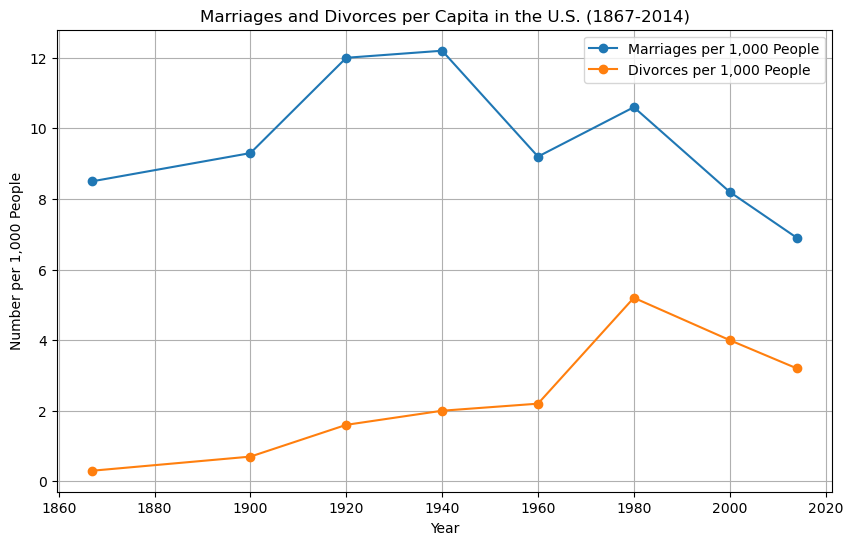

In [12]:
import matplotlib.pyplot as plt

# Data for the number of marriages and divorces per capita in the U.S. (per 1,000 people)
# between 1867 and 2014 (example dataset for demonstration purposes).
years = [1867, 1900, 1920, 1940, 1960, 1980, 2000, 2014]
marriages_per_capita = [8.5, 9.3, 12.0, 12.2, 9.2, 10.6, 8.2, 6.9]
divorces_per_capita = [0.3, 0.7, 1.6, 2.0, 2.2, 5.2, 4.0, 3.2]

# Create the plot
plt.figure(figsize = (10, 6))

# Plot marriages
plt.plot(years, marriages_per_capita, label = 'Marriages per 1,000 People', marker = 'o')

# Plot divorces
plt.plot(years, divorces_per_capita, label = 'Divorces per 1,000 People', marker = 'o')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Number per 1,000 People')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()

# Show grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()


Question 7:

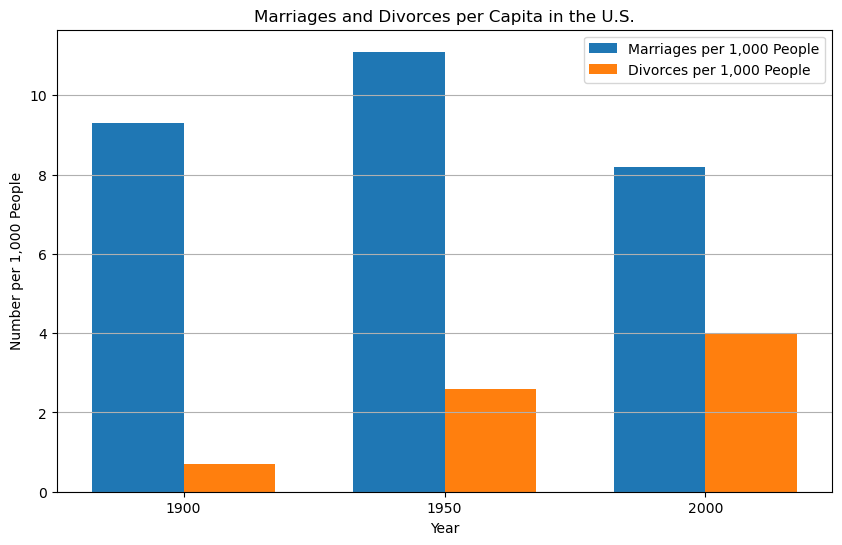

In [13]:
import numpy as np

# Data for marriages and divorces per capita in the U.S. (per 1,000 people) for selected years
years = ['1900', '1950', '2000']
marriages = [9.3, 11.1, 8.2]
divorces = [0.7, 2.6, 4.0]

# Set the positions of the bars on the x-axis
x = np.arange(len(years))

# Set width of the bars
width = 0.35 

# Create the plot
plt.figure(figsize = (10, 6))
plt.bar(x - width/2, marriages, width, label='Marriages per 1,000 People')
plt.bar(x + width/2, divorces, width, label='Divorces per 1,000 People')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Number per 1,000 People')
plt.title('Marriages and Divorces per Capita in the U.S.')
plt.xticks(x, years)
plt.legend()

plt.grid(axis='y')

# Display the plot
plt.show()


Question 8:

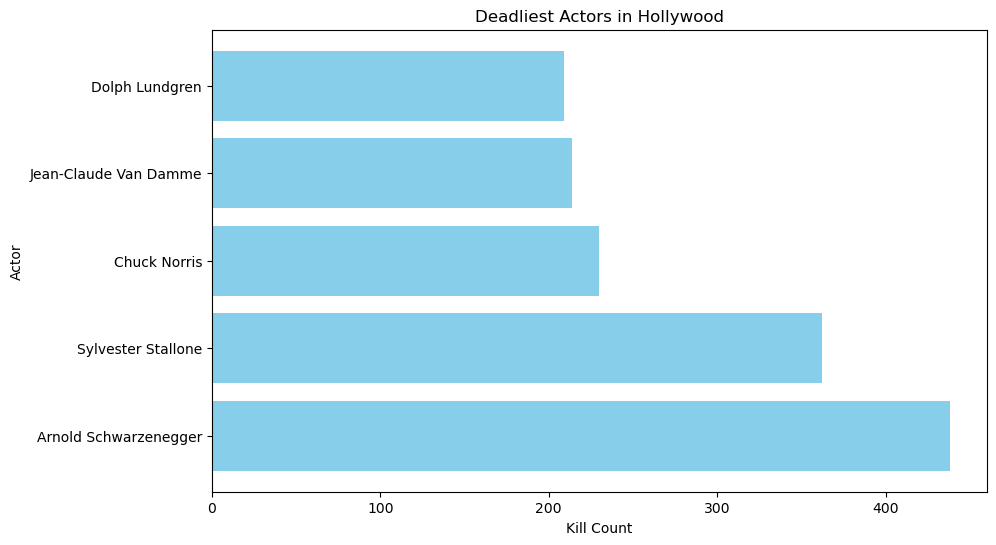

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your actual data)
data = {
            'Actor': ['Arnold Schwarzenegger', 'Sylvester Stallone', 'Chuck Norris', 'Jean-Claude Van Damme', 'Dolph Lundgren'],
            'Kill Count': [438, 362, 230, 214, 209]
       }

# Create a DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by kill count in descending order
df = df.sort_values(by='Kill Count', ascending = False)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['Actor'], df['Kill Count'], color = 'skyblue')

# Add labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Show the plot
plt.show()

Question 9:

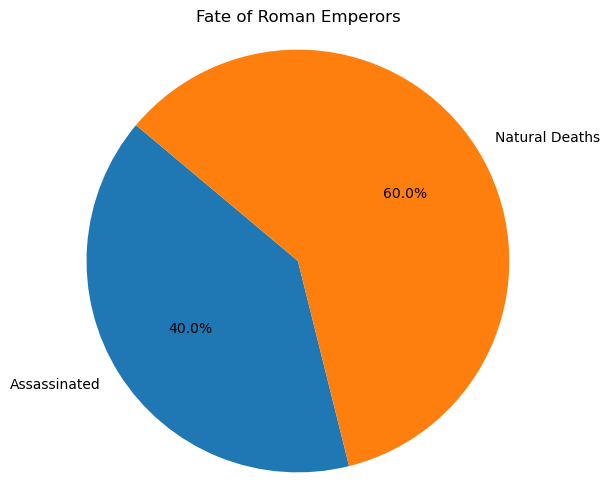

In [4]:
# Import libraries
import matplotlib.pyplot as plt

# Define categories and percentages (replace with your data if you have any)
categories = ['Assassinated', 'Natural Deaths']

# Assuming 40% assassinated emperors (low confidence data)
percentages = [40, 60]

# Create pie chart
plt.figure(figsize = (6, 6))  # Set figure size
plt.pie(percentages, labels=categories, autopct = '%1.1f%%', startangle = 140)

# Equal aspect ratio ensures a circular pie chart
plt.axis('equal')

# Add title
plt.title('Fate of Roman Emperors')

# Show plot
plt.show()

Question 10:

C:\Users\DELL\AppData\Local\Temp\ipykernel_5256\323265117.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # Choose a colormap
C:\Users\DELL\AppData\Local\Temp\ipykernel_5256\323265117.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(arcade_revenue[i], cs_phds[i], label=year, c=cmap(i / len(years)))


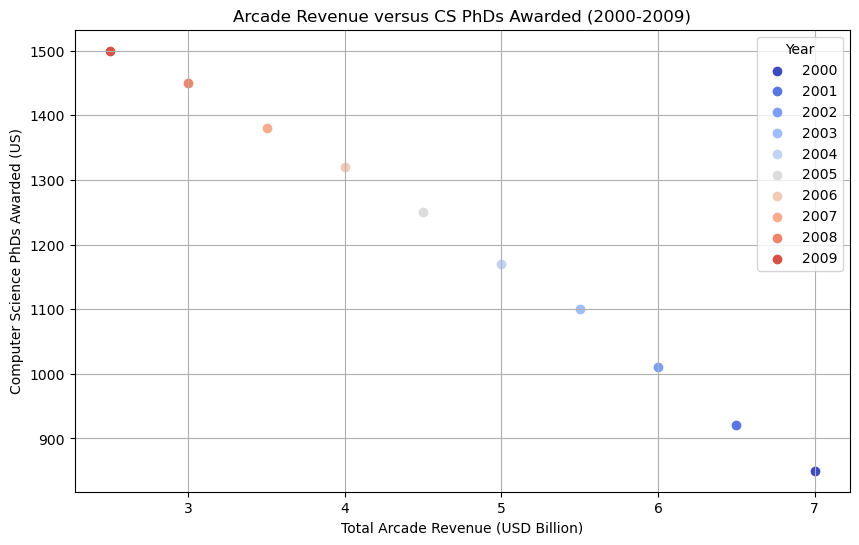

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Data (low confidence, replace with actual data if available)
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
arcade_revenue = [7.0, 6.5, 6.0, 5.5, 5.0, 4.5, 4.0, 3.5, 3.0, 2.5]  # in billions
cs_phds = [850, 920, 1010, 1100, 1170, 1250, 1320, 1380, 1450, 1500]

# Color map for year visualization
cmap = cm.get_cmap('coolwarm')  # Choose a colormap

# Create scatter plot
plt.figure(figsize=(10, 6))
for i, year in enumerate(years):
    plt.scatter(arcade_revenue[i], cs_phds[i], label=year, c=cmap(i / len(years)))

# Add labels and title
plt.xlabel('Total Arcade Revenue (USD Billion)')
plt.ylabel('Computer Science PhDs Awarded (US)')
plt.title('Arcade Revenue versus CS PhDs Awarded (2000-2009)')
plt.legend(title = 'Year')

# Show plot
plt.grid(True)
plt.show()